In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.machinelearningplus.com/python/101-pandas-exercises-python/

##### 1. Import pandas, check version

In [2]:
print(pd.__version__)

1.0.5


##### 2. How to create a series from a list, numpy array and dict?

In [111]:
mylist = list('abcedfghi')
myarr = np.arange(6)
mydict = dict(zip(mylist, myarr))

In [117]:
pd.Series(myarr, list('abcedf'))

a    0
b    1
c    2
e    3
d    4
f    5
dtype: int32

In [4]:
pd.Series(mylist)

0    a
1    b
2    c
3    e
4    d
5    f
6    g
7    h
8    i
dtype: object

In [5]:
pd.Series(myarr)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

In [6]:
mydict

{'a': 0, 'b': 1, 'c': 2, 'e': 3, 'd': 4, 'f': 5}

In [7]:
pd.Series(mydict)

a    0
b    1
c    2
e    3
d    4
f    5
dtype: int64

##### 3. How to convert the index of a series into a column of a dataframe?

In [8]:
pd.DataFrame(pd.Series(mydict)).reset_index()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4
5,f,5


##### 4. How to combine many series to form a dataframe?

In [9]:
ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

In [10]:
pd.concat([ser1, ser2, ser3], axis=1)

,0,1,2
0,a,0.0,NaN
1,b,1.0,NaN
2,c,2.0,NaN
3,e,3.0,NaN
4,d,4.0,NaN
5,f,5.0,NaN
6,g,NaN,NaN
7,h,NaN,NaN
8,i,NaN,NaN
a,NaN,NaN,0.0


In [11]:
pd.DataFrame({'col1': ser1, "col2": ser2, 'col3': ser3})

,col1,col2,col3
0,a,0.0,NaN
1,b,1.0,NaN
2,c,2.0,NaN
3,e,3.0,NaN
4,d,4.0,NaN
5,f,5.0,NaN
6,g,NaN,NaN
7,h,NaN,NaN
8,i,NaN,NaN
a,NaN,NaN,0.0


##### 5. How to assign name to the series’ index? <br>
Difficulty Level: L1 Give a name to the series ser calling it ‘alphabets’. Input 

In [12]:
ser = pd.Series(list('abcedfz'), name="some_name")

In [13]:
ser

0    a
1    b
2    c
3    e
4    d
5    f
6    z
Name: some_name, dtype: object

In [14]:
ser.name = 'alphabets'

In [15]:
ser

0    a
1    b
2    c
3    e
4    d
5    f
6    z
Name: alphabets, dtype: object

##### 6. How to get the items of series A not present in series B? <br>
Difficulty Level: L2 From ser1 remove items present in ser2.

In [16]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [17]:
ser1[~ser1.isin(ser2)]  # отрицание 

0    1
1    2
2    3
dtype: int64

##### 7. How to get the items not common to both series A and series B?
Difficulty Level: L2 Get all items of ser1 and ser2 not common to both. Input 

In [18]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

Desired Output: 1, 2, 3, 6, 7, 8

In [19]:
pd.concat([ser1, ser2], axis=1)

,0,1
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


first way - convert into index

In [20]:
pd.Index(ser1.values).union(pd.Index(ser2.values))

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [21]:
pd.Index(ser1.values).intersection(pd.Index(ser2.values))

Int64Index([4, 5], dtype='int64')

In [22]:
t1 = pd.Index(ser1.values).union(pd.Index(ser2.values))
t2 = pd.Index(ser1.values).intersection(pd.Index(ser2.values))
t1[~t1.isin(t2)].values

array([1, 2, 3, 6, 7, 8], dtype=int64)

second way - use numpy:

In [23]:
print(np.union1d(ser1, ser2))
print(np.intersect1d(ser1, ser2))

[1 2 3 4 5 6 7 8]
[4 5]


In [24]:
ser_union = pd.Series(np.union1d(ser1, ser2))
ser_intersect = pd.Series(np.intersect1d(ser1, ser2))
ser_union[~ser_union.isin(ser_intersect)].values

array([1, 2, 3, 6, 7, 8], dtype=int64)

##### 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?
Difficuty Level: L2 Compute the minimum, 25th percentile, median, 75th, and maximum of ser. Input 

np.random.normal(10, 5, 25)<br>
np.random.normal(loc, scale, size)<br>
loc - среднее арифметическое (мат ожидание)<br>
scale - standart deviation $\sigma$<br>
size - кол-во элементов, которое надо сгенерировать

(array([1., 2., 2., 5., 5., 1., 3., 1., 1., 4.]),
 array([ 0.52243946,  2.39800088,  4.27356229,  6.14912371,  8.02468512,
         9.90024654, 11.77580795, 13.65136937, 15.52693078, 17.4024922 ,
        19.27805361]),
 <a list of 10 Patch objects>)

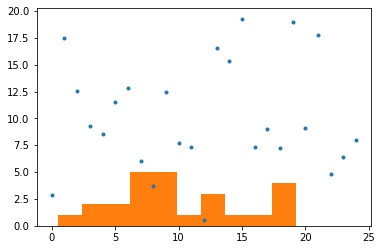

In [25]:
ser = pd.Series(np.random.normal(10, 5, 25))
plt.plot(ser.values, '.')
plt.hist(ser.values)

minimum | maximum | median

In [26]:
print(ser.median(), ser.min(), ser.max())

9.001921977224008 0.5224394619783297 19.278053610665463


In [27]:
np.sort(ser.values)[12]

9.001921977224008

**Определение <br>**
Медиана - это квантиль порядка 0.5<br>
P(X <= medX) >= 0.5<br>
P(X >= medX) >= 0.5<br>

**Определение**<br>
Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем <br>
Квантиль порядка а - это такая величина Xa, что <br>
P(X <= Xa) >= a<br>
P(X >= Xa) >= 1-a<br>

In [28]:
ser.quantile(q=0.25)

7.20380983040493

In [29]:
ser.quantile(q=0.75)

12.81503506469763

In [30]:
ser.quantile(q=0.5) # получим медиану

9.001921977224008

In [31]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 0.52243946,  7.20380983,  9.00192198, 12.81503506, 19.27805361])

In [32]:
np.quantile(ser, q=[0, 0.25, 0.5, 0.75, 1])

array([ 0.52243946,  7.20380983,  9.00192198, 12.81503506, 19.27805361])

##### 9. How to get frequency counts of unique items of a series?
Difficulty Level: L1 Calculte the frequency counts of each unique value ser. Input 

In [33]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

In [34]:
np.take(list('abcdefgh'), np.random.randint(8, size=30))

array(['b', 'c', 'b', 'd', 'f', 'a', 'd', 'g', 'e', 'f', 'e', 'b', 'e',
       'h', 'd', 'b', 'd', 'e', 'c', 'a', 'b', 'a', 'g', 'a', 'a', 'f',
       'f', 'c', 'f', 'f'], dtype='<U1')

In [35]:
ser.value_counts() # подсчет уникальных значений

g    8
c    5
a    4
h    3
f    3
d    3
b    2
e    2
dtype: int64

In [36]:
print(ser.size)
print(len(ser))

30
30


In [37]:
# чтобы получить частоту, поделим на общее кол-во:
ser.value_counts() / ser.size

g    0.266667
c    0.166667
a    0.133333
h    0.100000
f    0.100000
d    0.100000
b    0.066667
e    0.066667
dtype: float64

In [38]:
# проверим, что сумма равна 1
(ser.value_counts() / ser.size).sum()

1.0

##### 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?
Difficulty Level: L2 From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’. Input 

In [39]:
np.random.RandomState(100) # What is this? I don't understand
ser = pd.Series(np.random.randint(1, 5, [12]))
# np.random.randint(low, high, size)

In [40]:
ser

0     4
1     2
2     4
3     2
4     3
5     4
6     1
7     3
8     3
9     2
10    2
11    1
dtype: int32

In [41]:
# start with finding 2 most frequent values
arr1 = ser.value_counts().index[[0, 1]].values
arr1

array([2, 4], dtype=int64)

In [42]:
# elements, except arr1
ser2 = ser[~ser.isin(arr1)]
ser2

4     3
6     1
7     3
8     3
11    1
dtype: int32

In [43]:
ser.replace(ser2, 'other', inplace=True)
ser

0         4
1         2
2         4
3         2
4     other
5         4
6     other
7     other
8     other
9         2
10        2
11    other
dtype: object

In [44]:
# other way:
ser[~ser.isin(arr1)] = 'other1'
ser

0          4
1          2
2          4
3          2
4     other1
5          4
6     other1
7     other1
8     other1
9          2
10         2
11    other1
dtype: object

##### 11. How to bin a numeric series to 10 groups of equal size?
Difficulty Level: L2 Bin the series ser into 10 equal deciles and replace the values with the bin name. Input 
<br> **https://pbpython.com/pandas-qcut-cut.html** <br>
**pandas.qcut(x, q)**, <br>
x - 1d ndarray or Series <br>
q - int or list-like of float <br>
Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.<br>
**pandas.cut(x, bins)**<br>
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.<br>
x - array-like, The input array to be binned. Must be 1-dimensional.<br>
bins - int, sequence of scalars, or IntervalIndex

In [45]:
ser = pd.Series(np.random.random(20))
# generate 20 random floats from
# the half-open interval [0.0, 1.0). 

In [46]:
print(ser.values)

[0.6637884  0.71617723 0.62852558 0.62192147 0.13749995 0.38772197
 0.05034741 0.52656716 0.81900501 0.36350977 0.41225501 0.89887834
 0.67248793 0.92125212 0.59198329 0.67709727 0.81442308 0.88798279
 0.20037745 0.37079154]


In [47]:
ser.describe()

count    20.000000
mean      0.568130
std       0.256403
min       0.050347
25%       0.383489
50%       0.625224
75%       0.740739
max       0.921252
dtype: float64

In [48]:
pd.qcut(ser, 4).cat.categories
# Accessor object for
# categorical properties of the Series values.

IntervalIndex([(0.0493, 0.383], (0.383, 0.625], (0.625, 0.741], (0.741, 0.921]],
              closed='right',
              dtype='interval[float64]')

In [49]:
pd.qcut(ser, 10)

0      (0.625, 0.667]
1      (0.689, 0.815]
2      (0.625, 0.667]
3      (0.566, 0.625]
4     (0.0493, 0.194]
5      (0.369, 0.405]
6     (0.0493, 0.194]
7      (0.405, 0.566]
8      (0.815, 0.889]
9      (0.194, 0.369]
10     (0.405, 0.566]
11     (0.889, 0.921]
12     (0.667, 0.689]
13     (0.889, 0.921]
14     (0.566, 0.625]
15     (0.667, 0.689]
16     (0.689, 0.815]
17     (0.815, 0.889]
18     (0.194, 0.369]
19     (0.369, 0.405]
dtype: category
Categories (10, interval[float64]): [(0.0493, 0.194] < (0.194, 0.369] < (0.369, 0.405] < (0.405, 0.566] ... (0.667, 0.689] < (0.689, 0.815] < (0.815, 0.889] < (0.889, 0.921]]

In [50]:
pd.qcut(ser, q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head()

0    6th
1    8th
2    6th
3    5th
4    1st
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

##### 12. How to convert a numpy array to a dataframe of given shape? (L1)
Difficulty Level: L1 Reshape the series ser into a dataframe with 7 rows and 5 columns Input 

In [51]:
ser = pd.Series(np.random.randint(1, 10, 35))

In [52]:
pd.DataFrame(ser.values.reshape((7, 5)))

,0,1,2,3,4
0,2,2,4,8,5
1,2,8,7,9,6
2,8,5,2,3,3
3,3,5,3,1,3
4,9,9,5,2,9
5,6,9,7,4,4
6,9,5,8,2,2


##### 13. How to find the positions of numbers that are multiples of 3 from a series?
Difficulty Level: L2 Find the positions of numbers that are multiples of 3 from ser. Input

In [53]:
ser = pd.Series(np.random.randint(1, 10, 7))

In [54]:
ser

0    4
1    8
2    9
3    4
4    9
5    9
6    2
dtype: int32

In [55]:
ser[ser%3==0].index.values

array([2, 4, 5], dtype=int64)

In [56]:
np.argwhere(ser.values % 3==0)

array([[2],
       [4],
       [5]], dtype=int64)

##### 14. How to extract items at given positions from a series
Difficulty Level: L1 From ser, extract the items at positions in list pos. Input 

In [57]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [58]:
ser.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [59]:
ser.iloc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [60]:
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

##### 15. How to stack two series vertically and horizontally ?
Difficulty Level: L1 Stack ser1 and ser2 vertically and horizontally (to form a dataframe). Input 

In [61]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [62]:
ser1.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [63]:
ser2.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [64]:
pd.concat([ser1, ser2], axis=0) # vertically

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [65]:
pd.concat([ser1, ser2], axis=1) # horizontally

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [66]:
# Vertically - other way
ser1.append(ser2)

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

##### 16. How to get the positions of items of series A in another series B?
Difficulty Level: L2 Get the positions of items of ser2 in ser1 as a list. Input 

In [67]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

desired out: [5, 4, 0, 8]

In [68]:
np.where(ser1.isin(ser2))

(array([0, 4, 5, 8], dtype=int64),)

In [69]:
list(np.array(
    [np.where(ser1 == i) for i in ser2]
             ).flatten())

[5, 4, 0, 8]

In [70]:
# use tolist() instead of flatten
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [71]:
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

##### 17. How to compute the mean squared error on a truth and predicted series?
Difficulty Level: L2 Compute the mean squared error of truth and pred series. Input <br>
$\text{mean squared error}=\dfrac{\sum{(truth-pred)^2}}{N}$

In [72]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [73]:
np.mean((truth-pred)**2)

0.470901819396393

In [74]:
np.sum((truth-pred)**2)/truth.size

0.47090181939639286

In [75]:
(truth-pred).var()

0.08434014439139152

##### 18. How to convert the first character of each element in a series to uppercase?
Difficulty Level: L2 Change the first character of each word to upper case in each word of ser. 

In [76]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [77]:
ser.str.title()

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [78]:
ser.map(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [79]:
ser.map(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [80]:
ser.apply(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [81]:
pd.Series([i.title() for i in ser])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [82]:
# I think, there are even more ways

##### 19. How to calculate the number of characters in each word in a series?
Difficulty Level: L2 Input 

In [83]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [84]:
ser.str.len()

0    3
1    2
2    4
3    4
dtype: int64

In [85]:
ser.map(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

##### 20. How to compute difference of differences between consequtive numbers of a series?
Difficulty Level: L1 Difference of differences between the consequtive numbers of ser. Input 

In [86]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

Desired Output <br>
[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]<br>
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

In [87]:
np.diff(ser.values)

array([2, 3, 4, 5, 6, 6, 8], dtype=int64)

In [88]:
np.diff(ser.values, n=2)

array([1, 1, 1, 1, 0, 2], dtype=int64)

In [89]:
ser.diff(periods=1).tolist()

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]

In [90]:
ser.diff(periods=1).diff(periods=1).tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

##### 21. How to convert a series of date-strings to a timeseries?
Difficiulty Level: L2 Input 

In [91]:
ser = pd.Series(['01 Jan 2010', '02-02-2011',
                 '20120303', '2013/04/04',
                 '2014-05-05', '2015-06-06T12:20'])

Desired Output <br>
0   2010-01-01 00:00:00<br>
1   2011-02-02 00:00:00<br>
2   2012-03-03 00:00:00<br>
3   2013-04-04 00:00:00<br>
4   2014-05-05 00:00:00<br>
5   2015-06-06 12:20:00<br>
dtype: datetime64[ns]<br>

In [92]:
pd.to_datetime(ser) 

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [93]:
from dateutil.parser import parse
ser.map(lambda x: parse(x))

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

##### 22. How to get the day of month, week number, day of year and day of week from a series of date strings?
Difficiulty Level: L2 Get the day of month, week number, day of year and day of week from ser. Input 

In [94]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

Desired output<br>
Date:  [1, 2, 3, 4, 5, 6] - **day**<br>
Week number:  [53, 5, 9, 14, 19, 23] - **week/weekofyear**<br>
Day num of year:  [1, 33, 63, 94, 125, 157] - **dayofyear**<br>
Day of week:  ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday'] - **day_name()/weekday_name**

In [95]:
pd.to_datetime(ser).dt.day.tolist() # day of month

[1, 2, 3, 4, 5, 6]

In [96]:
pd.to_datetime(ser).dt.week.tolist()

[53, 5, 9, 14, 19, 23]

In [97]:
pd.to_datetime(ser).dt.dayofyear.tolist()

[1, 33, 63, 94, 125, 157]

In [98]:
pd.to_datetime(ser).dt.weekday.tolist()

[4, 2, 5, 3, 0, 5]

In [99]:
pd.to_datetime(ser).dt.day_name().tolist()

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

##### 23. How to convert year-month string to dates corresponding to the 4th day of the month?
Difficiulty Level: L2 Change ser to dates that start with 4th of the respective months. Input 

In [100]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

Desired Output<br>
0   2010-01-04<br>
1   2011-02-04<br>
2   2012-03-04<br>
dtype: datetime64[ns]

In [101]:
pd.to_datetime(ser)

0   2010-01-01
1   2011-02-01
2   2012-03-01
dtype: datetime64[ns]

In [102]:
pd.Timedelta(3, unit='D')

Timedelta('3 days 00:00:00')

In [103]:
ser.apply(lambda x: pd.to_datetime(x)+pd.Timedelta(3, unit='D'))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [104]:
# Solution 2
ser.map(lambda x: parse('04 ' + x))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [105]:
# Solution 3
ser_ts = ser.map(lambda x: parse(x))
ser_ts

0   2010-01-08
1   2011-02-08
2   2012-03-08
dtype: datetime64[ns]

In [106]:
ser_datestr = ser_ts.dt.year.astype('str') +\
 '-' + ser_ts.dt.month.astype('str') + \
'-' + '04'
ser_datestr

0    2010-1-04
1    2011-2-04
2    2012-3-04
dtype: object

In [107]:
[parse(i).strftime('%Y-%m-%d') for i in ser_datestr]

['2010-01-04', '2011-02-04', '2012-03-04']

##### 24. How to filter words that contain atleast 2 vowels from a series?
Difficiulty Level: L3 From ser, extract words that contain atleast 2 vowels. Input 

In [108]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

Desired Output
0     Apple
1    Orange
4     Money
dtype: object

In [109]:
vowels = ['a', 'e', 'i', 'o', 'u']

In [110]:
ser.str.contains('[aeiou]{2}', regex=True)

0    False
1    False
2    False
3    False
4    False
dtype: bool

##### 25. How to filter valid emails from a series?
Difficiulty Level: L3 Extract the valid emails from the series emails. The regex pattern for valid emails is provided as reference. Input 

In [122]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'
pattern1 ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,4}'

In [131]:
emails.str.match(pattern)

0    False
1     True
2     True
3     True
dtype: bool

In [132]:
emails.str.match(pattern1)

0    False
1     True
2     True
3     True
dtype: bool

In [135]:
import re
pattern2 = re.compile(pattern1)
[pattern2.match(i) for i in emails.values]

[None,
 <re.Match object; span=(0, 17), match='rameses@egypt.com'>,
 <re.Match object; span=(0, 9), match='matt@t.co'>,
 <re.Match object; span=(0, 17), match='narendra@modi.com'>]

In [136]:
emails[emails.str.match(pattern1)]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [137]:
# Solution 1 (as series of strings)
import re
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'
mask = emails.map(lambda x: bool(re.match(pattern, x)))
emails[mask]

# Solution 2 (as series of list)
emails.str.findall(pattern, flags=re.IGNORECASE)

# Solution 3 (as list)
[x[0] for x in [re.findall(pattern, email) for email in emails] if len(x) > 0]

['rameses@egypt.com', 'matt@t.co', 'narendra@modi.com']

##### 26. How to get the mean of a series grouped by another series?
Difficiulty Level: L2 Compute the mean of weights of each fruit. Input 

In [139]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weight = pd.Series(np.linspace(1, 10, 10))
print(weight.tolist())
print(fruit.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
['banana', 'banana', 'carrot', 'apple', 'banana', 'banana', 'carrot', 'carrot', 'banana', 'carrot']


Desired output<br>
values can change due to randomness<br>
apple     6.0<br>
banana    4.0<br>
carrot    5.8<br>
dtype: float64

In [142]:
fruit.unique()

array(['banana', 'carrot', 'apple'], dtype=object)

In [157]:
df1 = pd.concat([fruit, weight], axis=1)
df1.rename(columns={0:"fruit", 1: "weight"}, inplace=True)
df1

,fruit,weight
0,banana,1.0
1,banana,2.0
2,carrot,3.0
3,apple,4.0
4,banana,5.0
5,banana,6.0
6,carrot,7.0
7,carrot,8.0
8,banana,9.0
9,carrot,10.0


In [158]:
df2 = pd.DataFrame({"fruit": fruit, 'weight':weight})
df2

,fruit,weight
0,banana,1.0
1,banana,2.0
2,carrot,3.0
3,apple,4.0
4,banana,5.0
5,banana,6.0
6,carrot,7.0
7,carrot,8.0
8,banana,9.0
9,carrot,10.0


In [161]:
df1.groupby("fruit").weight.mean()

fruit
apple     4.0
banana    4.6
carrot    7.0
Name: weight, dtype: float64

In [162]:
(1+2+5+6+9)/5

4.6

In [165]:
df1.groupby("fruit").weight.apply(print)

3    4.0
Name: apple, dtype: float64
0    1.0
1    2.0
4    5.0
5    6.0
8    9.0
Name: banana, dtype: float64
2     3.0
6     7.0
7     8.0
9    10.0
Name: carrot, dtype: float64


fruit
apple     None
banana    None
carrot    None
Name: weight, dtype: object

##### 27. How to compute the euclidean distance between two series?
Difficiulty Level: L2 Compute the euclidean distance between series (points) p and q, without using a packaged formula. Input 

In [166]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

Desired Output  18.165

In [169]:
import scipy.linalg

In [173]:
scipy.linalg.norm(p - q)

18.16590212458495

In [174]:
np.sum((p - q)**2) ** 0.5

18.16590212458495

##### 28. How to find all the local maxima (or peaks) in a numeric series?
Difficiulty Level: L3 Get the positions of peaks (values surrounded by smaller values on both sides) in ser. Input

In [175]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

Desired output<br>
array([1, 5, 7])

In [179]:
ser.diff()

0    NaN
1    8.0
2   -7.0
3    1.0
4    5.0
5    1.0
6   -8.0
7    5.0
8   -4.0
dtype: float64

In [191]:
[i-1 for i in range(2, len(ser), 2) if (ser.diff().iloc[i]*ser.diff().iloc[i-1]<0)]

[1, 5, 7]

Solution 2

In [193]:
dd = np.diff(np.sign(np.diff(ser)))
dd

array([-2,  2,  0,  0, -2,  2, -2], dtype=int64)

In [194]:
np.diff(ser)

array([ 8, -7,  1,  5,  1, -8,  5, -4], dtype=int64)

In [195]:
np.sign(np.diff(ser))

array([ 1, -1,  1,  1,  1, -1,  1, -1], dtype=int64)

In [196]:
np.diff(np.sign(np.diff(ser)))

array([-2,  2,  0,  0, -2,  2, -2], dtype=int64)

In [197]:
np.where(dd == -2)[0] + 1

array([1, 5, 7], dtype=int64)

##### 29. How to replace missing spaces in a string with the least frequent character?
Replace the spaces in my_str with the least frequent character. Difficiulty Level: L2 Input 

In [198]:
my_str = 'dbc deb abed gade'

Desired Output <br>
'dbccdebcabedcgade'  # least frequent is 'c'

In [233]:
# 1 find least frequent character
ser = pd.Series(list(my_str))
least_letter = ser.value_counts().sort_values(ascending=False
                                             ).reset_index().rename(columns=
                                                                    {'index':'letter', 0:'num'}).iloc[-1].letter
least_letter

'c'

In [237]:
print(''.join(ser.replace(' ', least_letter).to_list()))

dbccdebcabedcgade


##### 30. How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays) after that having random numbers as values?
Difficiulty Level: L2 Desired output<br>
values can be random<br>
2000-01-01    4<br>
2000-01-08    1<br>
2000-01-15    8<br>
2000-01-22    4<br>
2000-01-29    4<br>
2000-02-05    2<br>
2000-02-12    4<br>
2000-02-19    9<br>
2000-02-26    6<br>
2000-03-04    6

In [257]:
# начнем с генерации списка дат
import datetime 
list_time = [pd.to_datetime('2000-01-01') + pd.Timedelta(i, 'D') for i in range(0, 70, 7)]
list_time

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-01-08 00:00:00'),
 Timestamp('2000-01-15 00:00:00'),
 Timestamp('2000-01-22 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-02-05 00:00:00'),
 Timestamp('2000-02-12 00:00:00'),
 Timestamp('2000-02-19 00:00:00'),
 Timestamp('2000-02-26 00:00:00'),
 Timestamp('2000-03-04 00:00:00')]

In [262]:
list_randval = list(np.random.randint(10, size = len(list_time)))
list_randval

[6, 9, 2, 8, 5, 9, 0, 1, 1, 0]

In [264]:
pd.Series(list_randval, index=list_time)

2000-01-01    6
2000-01-08    9
2000-01-15    2
2000-01-22    8
2000-01-29    5
2000-02-05    9
2000-02-12    0
2000-02-19    1
2000-02-26    1
2000-03-04    0
dtype: int64

In [265]:
# Solution 2
pd.Series(np.random.randint(1,10,10), pd.date_range('2000-01-01', periods=10, freq='W-SAT'))

2000-01-01    9
2000-01-08    8
2000-01-15    3
2000-01-22    6
2000-01-29    6
2000-02-05    9
2000-02-12    1
2000-02-19    6
2000-02-26    8
2000-03-04    3
Freq: W-SAT, dtype: int32

##### 31. How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?
Difficiulty Level: L2 ser has missing dates and values. Make all missing dates appear and fill up with value from previous date. Input 

In [266]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


Desired Output<br>
2000-01-01     1.0<br>
2000-01-02     1.0<br>
2000-01-03    10.0<br>
2000-01-04    10.0<br>
2000-01-05    10.0<br>
2000-01-06     3.0<br>
2000-01-07     3.0<br>
2000-01-08     NaN

In [279]:
ser.reindex(pd.date_range(ser.index.min(), ser.index.max()), method='ffill')

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

In [269]:
ser.index.max()


Timestamp('2000-01-08 00:00:00')

##### 32. How to compute the autocorrelations of a numeric series?
Difficiulty Level: L3 Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation. Input 

In [280]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

Desired output<br> values will change due to randomness
[0.29999999999999999, -0.11, -0.17000000000000001, 0.46000000000000002, 0.28000000000000003, -0.040000000000000001, -0.37, 0.41999999999999998, 0.47999999999999998, 0.17999999999999999]
Lag having highest correlation:  9

In [282]:
[ser.autocorr(i) for i in range(10)]

[1.0,
 0.33490983743954594,
 0.08751527147711129,
 0.006846358417280911,
 0.060345981668586283,
 0.2151006000956429,
 0.21271111585313168,
 0.1655166503470404,
 -0.5253071236233601,
 -0.44264243448643076]

#### Series.autocorr(lag=1)[source] 

    Compute the lag-N autocorrelation.

    This method computes the Pearson correlation between the Series and its shifted self.

    Parameters

        lag - int, default 1

            Number of lags to apply before performing autocorrelation.



##### 33. How to import only every nth row from a csv file to create a dataframe?
Difficiulty Level: L2 Import every 50th row of BostonHousing dataset as a dataframe. 

In [290]:
# Solution 1: Use chunks and for-loop
# now df = <pandas.io.parsers.TextFileReader at 0x220df846670> -- iterator
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.DataFrame()
for chunk in df:
    df2 = df2.append(chunk.iloc[0,:])
df2

,age,b,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1.0,6.575,296.0,18.0
50,45.7,395.56,0.0,0.08873,6.8147,5.64,13.45,19.7,0.439,16.8,4.0,5.963,243.0,21.0
100,79.9,394.76,0.0,0.14866,2.7778,8.56,9.42,27.5,0.520,20.9,5.0,6.727,384.0,0.0
150,97.3,372.80,0.0,1.65660,1.6180,19.58,14.10,21.5,0.871,14.7,5.0,6.122,403.0,0.0
200,13.9,384.30,0.0,0.01778,7.6534,1.47,4.45,32.9,0.403,17.0,3.0,7.135,402.0,95.0
250,13.0,396.28,0.0,0.14030,7.3967,5.86,5.90,24.4,0.431,19.1,7.0,6.487,330.0,22.0
300,47.4,390.86,0.0,0.04417,7.8278,2.24,6.07,24.8,0.400,14.8,5.0,6.871,358.0,70.0
350,44.4,396.90,0.0,0.06211,8.7921,1.25,5.98,22.9,0.429,19.7,1.0,6.490,335.0,40.0
400,100.0,396.90,0.0,25.04610,1.5888,18.10,26.77,5.6,0.693,20.2,24.0,5.987,666.0,0.0
450,92.6,0.32,0.0,6.71772,2.3236,18.10,17.44,13.4,0.713,20.2,24.0,6.749,666.0,0.0


##### 34. How to change column values when importing csv to a dataframe?
Difficulty Level: L2 Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

In [292]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', 
                 converters={'medv': lambda x: 'High' if float(x) > 25 else 'Low'})

##### 36. How to import only specified columns from a csv file?
Difficulty Level: L1 Import ‘crim’ and ‘medv’ columns of the BostonHousing dataset as a dataframe.

In [305]:
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv',
            usecols=['crim', 'medv'])

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


##### 37. How to get the nrows, ncolumns, datatype, summary stats of each column of a dataframe? Also get the array and list equivalent.
Difficulty Level: L2 Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. Also get the numpy array and list equivalent of the dataframe.

In [315]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [316]:
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [317]:
df['Min.Price'].describe() # summary statistics

count    86.000000
mean     17.118605
std       8.828290
min       6.700000
25%      10.825000
50%      14.600000
75%      20.250000
max      45.400000
Name: Min.Price, dtype: float64

In [318]:
#  number of rows and columns 
df.shape

(93, 27)

In [320]:
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

In [322]:
# how many columns under each dtype
print(df.dtypes.value_counts())


float64    18
object      9
dtype: int64


In [324]:
# numpy array 
df.values

array([['Acura', 'Integra', 'Small', ..., 2705.0, 'non-USA',
        'Acura Integra'],
       [nan, 'Legend', 'Midsize', ..., 3560.0, 'non-USA', 'Acura Legend'],
       ['Audi', '90', 'Compact', ..., 3375.0, 'non-USA', 'Audi 90'],
       ...,
       ['Volkswagen', 'Corrado', 'Sporty', ..., 2810.0, 'non-USA',
        'Volkswagen Corrado'],
       ['Volvo', '240', 'Compact', ..., 2985.0, 'non-USA', 'Volvo 240'],
       [nan, '850', 'Midsize', ..., 3245.0, 'non-USA', 'Volvo 850']],
      dtype=object)

In [442]:
# list
df.values.tolist() [1]

[nan,
 'Legend',
 'Midsize',
 29.2,
 33.9,
 38.7,
 18.0,
 25.0,
 'Driver & Passenger',
 'Front',
 '6',
 3.2,
 200.0,
 5500.0,
 2335.0,
 'Yes',
 18.0,
 5.0,
 195.0,
 115.0,
 71.0,
 38.0,
 30.0,
 15.0,
 3560.0,
 'non-USA',
 'Acura Legend']

##### 38. How to extract the row and column number of a particular cell with given criterion?

In [346]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [347]:
# Get Manufacturer with highest price
df.loc[df.Price == np.max(df.Price), ['Manufacturer', 'Model', 'Type']]

,Manufacturer,Model,Type
58,Mercedes-Benz,300E,Midsize


In [353]:
df.loc[df.Price == np.max(df.Price)][["Model", "Type"]]

,Model,Type
58,300E,Midsize


In [355]:
# Get Row and Column number
row, col = np.where(df.values == np.max(df.Price))
df.iloc[row[0], col[0]]

61.9

##### 39. How to rename a specific columns in a dataframe?
Difficulty Level: L2 Rename the column Type as CarType in df and replace the ‘.’ in column names with ‘_’. Input 

In [326]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df.columns)

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


In [328]:
df.rename({'Type':'CarType'}, axis=1, inplace=True)
print(df.columns)

Index(['Manufacturer', 'Model', 'CarType', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


In [344]:
df.rename(columns=dict(zip(df.columns.values,
                          list(map(lambda x: x.replace('.', '_'), df.columns.values)))), inplace=True)

In [345]:
df.columns.values

array(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price',
       'Max_Price', 'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile',
       'Man_trans_avail', 'Fuel_tank_capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn_circle', 'Rear_seat_room',
       'Luggage_room', 'Weight', 'Origin', 'Make'], dtype=object)

In [342]:
df.columns.map(lambda x: x.replace('.', '_'))

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [343]:
df.columns

Index(['Manufacturer', 'Model', 'CarType', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

##### 40. How to check if a dataframe has any missing values?
##### 41. How to count the number of missing values in each column?
Difficulty Level: L1 Check if df has any missing values. Input 

In [356]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [357]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [386]:
df.isnull().values.any() # use np.array method any 

True

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        89 non-null     object 
 1   Model               92 non-null     object 
 2   Type                90 non-null     object 
 3   Min.Price           86 non-null     float64
 4   Price               91 non-null     float64
 5   Max.Price           88 non-null     float64
 6   MPG.city            84 non-null     float64
 7   MPG.highway         91 non-null     float64
 8   AirBags             87 non-null     object 
 9   DriveTrain          86 non-null     object 
 10  Cylinders           88 non-null     object 
 11  EngineSize          91 non-null     float64
 12  Horsepower          86 non-null     float64
 13  RPM                 90 non-null     float64
 14  Rev.per.mile        87 non-null     float64
 15  Man.trans.avail     88 non-null     object 
 16  Fuel.tank.

In [379]:
df.apply(lambda x: x.isnull().sum())

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

In [381]:
df.isnull().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

##### 42. How to replace missing values of multiple numeric columns with the mean?
Difficulty Level: L2 Replace missing values in Min.Price and Max.Price columns with their respective mean. Input 

In [388]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [389]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [399]:
df.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

In [401]:
df["Price"].dtype

dtype('float64')

In [421]:
numeric_cols = df.dtypes[df.dtypes == 'float64'].index.to_list()
numeric_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [434]:
df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.900000,15.9,18.800000,25.0,31.0,1.800000,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0
1,29.200000,33.9,38.700000,18.0,25.0,3.200000,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0
2,25.900000,29.1,32.300000,20.0,26.0,2.800000,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0
3,17.118605,37.7,44.600000,19.0,26.0,2.658242,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0
4,17.118605,30.0,21.459091,22.0,30.0,3.500000,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.600000,19.7,22.700000,17.0,21.0,2.500000,109.0,4500.0,2915.0,21.1,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0
89,17.600000,20.0,22.400000,21.0,30.0,2.000000,134.0,5800.0,2685.0,18.5,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0
90,22.900000,23.3,23.700000,18.0,25.0,2.800000,178.0,5800.0,2385.0,18.5,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0
91,21.800000,22.7,23.500000,21.0,28.0,2.300000,114.0,5400.0,2215.0,15.8,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0


##### 43. How to use apply function on existing columns with global variables as additional arguments?
Difficulty Level: L3 In df, use apply method to replace the missing values in Min.Price with the column’s mean and those in Max.Price with the column’s median. Input 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [3]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [15]:
df["Min.Price"].apply(lambda x: df["Min.Price"].mean() if pd.isna(x) else x)

0     12.900000
1     29.200000
2     25.900000
3     17.118605
4     17.118605
        ...    
88    16.600000
89    17.600000
90    22.900000
91    21.800000
92    24.800000
Name: Min.Price, Length: 93, dtype: float64

In [33]:
def change(x):
    if x.name == "Min.Price":
        x.fillna(x.mean())
    if x.name == "Max.Price":
        x.fillna(x.median())
    return x.copy()

In [34]:
df.apply(change)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.900000,15.9,18.80,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.200000,33.9,38.70,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.900000,29.1,32.30,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,17.118605,37.7,44.60,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,17.118605,30.0,19.15,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.600000,19.7,22.70,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.600000,20.0,22.40,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.900000,23.3,23.70,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.800000,22.7,23.50,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [31]:
d = {'Min.Price': np.nanmean, 'Max.Price': np.nanmedian}
df[['Min.Price', 'Max.Price']] = df[['Min.Price', 'Max.Price']].apply(lambda x, d: x.fillna(d[x.name](x)), args=(d, ))

In [32]:
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.900000,15.9,18.80,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.200000,33.9,38.70,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.900000,29.1,32.30,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,17.118605,37.7,44.60,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,17.118605,30.0,19.15,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.600000,19.7,22.70,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.600000,20.0,22.40,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.900000,23.3,23.70,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.800000,22.7,23.50,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


##### 44. How to select a specific column from a dataframe as a dataframe instead of a series?
Difficulty Level: L2 Get the first column (a) in df as a dataframe (rather than as a Series). Input

In [42]:
df = pd.DataFrame(np.arange(20).reshape(4, 5), columns=list('abcde'))

In [45]:
pd.DataFrame(df['a'])

,a
0,0
1,5
2,10
3,15


In [50]:
df[['a']]

,a
0,0
1,5
2,10
3,15


In [53]:
df.loc[:, ['a']]

,a
0,0
1,5
2,10
3,15


In [55]:
df.loc[:, 'a'] # Series

0     0
1     5
2    10
3    15
Name: a, dtype: int32

##### 45. How to change the order of columns of a dataframe?
Difficulty Level: L3 Actually 3 questions. <br>

    1. In df, interchange columns 'a' and 'c'.
    2. Create a generic function to interchange two columns, without hardcoding column names.
    3. Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last.

Input 

In [60]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [61]:
df[['a', 'c']] = df[['c', 'a']]
df.rename(columns={'a': 'c', 'c': 'a'})

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [63]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
df[list('cbade')]

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [65]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
def swap_cols(df, name1, name2):
    df[[name1, name2]] = df[[name2, name1]]
    df = df.rename(columns={name1: name2, name2: name1})
    return df
swap_cols(df, 'a', 'c')

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [74]:
df[sorted(list('abcde'), reverse=True)]

,e,d,c,b,a
0,4,3,0,1,2
1,9,8,5,6,7
2,14,13,10,11,12
3,19,18,15,16,17


In [75]:
df[sorted(df.columns, reverse=True)]

,e,d,c,b,a
0,4,3,0,1,2
1,9,8,5,6,7
2,14,13,10,11,12
3,19,18,15,16,17


In [76]:
df.sort_index(axis=1, ascending=False, inplace=True)

In [77]:
df

,e,d,c,b,a
0,4,3,0,1,2
1,9,8,5,6,7
2,14,13,10,11,12
3,19,18,15,16,17


##### 46. How to set the number of rows and columns displayed in the output?
Difficulty Level: L2 Change the pandas display settings on printing the dataframe df it shows a maximum of 10 rows and 10 columns. Input 

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [83]:
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 7)

In [84]:
df

,Manufacturer,Model,Type,...,Weight,Origin,Make
0,Acura,Integra,Small,...,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,...,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,...,3375.0,non-USA,Audi 90
...,...,...,...,...,...,...,...
90,Volkswagen,Corrado,Sporty,...,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,...,2985.0,non-USA,Volvo 240
92,NaN,850,Midsize,...,3245.0,non-USA,Volvo 850


In [86]:
df.head()

,Manufacturer,Model,Type,...,Weight,Origin,Make
0,Acura,Integra,Small,...,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,...,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,...,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,...,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,...,3640.0,non-USA,BMW 535i


##### 47. How to format or suppress scientific notations in a pandas dataframe?
Difficulty Level: L2 Suppress scientific notations like ‘e-03’ in df and print upto 4 numbers after decimal. Input 

In [88]:
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])
df

,random
0,3.178210e-08
1,5.697460e-06
2,1.089449e-05
3,3.482500e-03


In [89]:
df.round(4)

,random
0,0.0000
1,0.0000
2,0.0000
3,0.0035


In [90]:
# Solution 2: Use apply to change format
df.apply(lambda x: '%.4f' % x, axis=1)

0    0.0000
1    0.0000
2    0.0000
3    0.0035
dtype: object

In [91]:
df.applymap(lambda x: '%.4f' % x)

,random
0,0.0000
1,0.0000
2,0.0000
3,0.0035


In [92]:
# Solution 3: Use set_option
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [93]:
df

,random
0,0.0000
1,0.0000
2,0.0000
3,0.0035


In [98]:
# Solution 4: Assign display.float_format
pd.options.display.float_format = '{:.4f}'.format
df

,random
0,0.0000
1,0.0000
2,0.0000
3,0.0035


In [99]:
# Reset/undo float formatting
pd.options.display.float_format = None
df

,random
0,3.178210e-08
1,5.697460e-06
2,1.089449e-05
3,3.482500e-03


##### 48. How to format all the values in a dataframe as percentages?
Difficulty Level: L2 Format the values in column 'random' of df as percentages. Input 

In [101]:
df = pd.DataFrame(np.random.random(4), columns=['random'])
df

,random
0,0.913769
1,0.831328
2,0.090606
3,0.431415


In [108]:
(round((df*100), 1)).astype(str)+'%'

,random
0,91.4%
1,83.1%
2,9.1%
3,43.1%


In [109]:
out = df.style.format({
    'random': '{0:.2%}'.format,
})

In [110]:
out

,random
0,91.38%
1,83.13%
2,9.06%
3,43.14%


In [111]:
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])
df

,random
0,5.400292e-04
1,7.815449e-02
2,5.902715e-01
3,1.134605e-09


In [113]:
out1 = df.style.format({
    'random' : '{0:.4f}'.format,
})

In [114]:
out1

,random
0,0.0005
1,0.0782
2,0.5903
3,0.0000


##### 49. How to filter every nth row in a dataframe?
Difficulty Level: L1 From df, filter the 'Manufacturer', 'Model' and 'Type' for every 20th row starting from 1st (row 0). Input 

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

In [117]:
df.iloc[::20, :]

,Manufacturer,Model,Type,...,Weight,Origin,Make
0,Acura,Integra,Small,...,2705.0,non-USA,Acura Integra
20,Chrysler,LeBaron,Compact,...,3085.0,USA,Chrysler LeBaron
40,Honda,Prelude,Sporty,...,2865.0,non-USA,Honda Prelude
60,Mercury,Cougar,Midsize,...,3610.0,USA,Mercury Cougar
80,Subaru,Loyale,Small,...,2490.0,non-USA,Subaru Loyale


In [118]:
df.iloc[::20, :][['Manufacturer', 'Model', 'Type']]

,Manufacturer,Model,Type
0,Acura,Integra,Small
20,Chrysler,LeBaron,Compact
40,Honda,Prelude,Sporty
60,Mercury,Cougar,Midsize
80,Subaru,Loyale,Small


##### 50. How to create a primary key index by combining relevant columns?
Difficulty Level: L2 In df, Replace NaNs with ‘missing’ in columns 'Manufacturer', 'Model' and 'Type' and create a index as a combination of these three columns and check if the index is a primary key. Input 

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv', usecols=[0,1,2,3,5])
df

,Manufacturer,Model,Type,Min.Price,Max.Price
0,Acura,Integra,Small,12.9,18.8
1,NaN,Legend,Midsize,29.2,38.7
2,Audi,90,Compact,25.9,32.3
...,...,...,...,...,...
90,Volkswagen,Corrado,Sporty,22.9,23.7
91,Volvo,240,Compact,21.8,23.5
92,NaN,850,Midsize,24.8,28.5


In [126]:
df[['Manufacturer', 'Model', 'Type']] = (df[['Manufacturer', 'Model', 'Type']]).fillna('missing')
df

,Manufacturer,Model,Type,Min.Price,Max.Price
0,Acura,Integra,Small,12.9,18.8
1,missing,Legend,Midsize,29.2,38.7
2,Audi,90,Compact,25.9,32.3
...,...,...,...,...,...
90,Volkswagen,Corrado,Sporty,22.9,23.7
91,Volvo,240,Compact,21.8,23.5
92,missing,850,Midsize,24.8,28.5


In [127]:
# Create index 
df.index = df.Manufacturer + '_' + df.Model + '_' + df.Type
df.index

Index(['Acura_Integra_Small', 'missing_Legend_Midsize', 'Audi_90_Compact',
       'Audi_100_Midsize', 'BMW_535i_Midsize', 'Buick_Century_Midsize',
       'Buick_LeSabre_Large', 'Buick_Roadmaster_Large',
       'Buick_Riviera_Midsize', 'Cadillac_DeVille_Large',
       'Cadillac_Seville_Midsize', 'Chevrolet_Cavalier_Compact',
       'Chevrolet_Corsica_Compact', 'Chevrolet_Camaro_Sporty',
       'Chevrolet_Lumina_Midsize', 'Chevrolet_Lumina_APV_Van',
       'Chevrolet_Astro_Van', 'Chevrolet_Caprice_Large',
       'Chevrolet_Corvette_Sporty', 'missing_Concorde_Large',
       'Chrysler_LeBaron_Compact', 'Chrysler_Imperial_Large',
       'Dodge_Colt_Small', 'Dodge_Shadow_Small', 'Dodge_Spirit_Compact',
       'Dodge_Caravan_Van', 'Dodge_Dynasty_Midsize', 'Dodge_Stealth_Sporty',
       'Eagle_Summit_Small', 'Eagle_Vision_Large', 'Ford_Festiva_Small',
       'Ford_Escort_Small', 'Ford_Tempo_Compact', 'Ford_Mustang_Sporty',
       'Ford_Probe_Sporty', 'Ford_Aerostar_Van', 'Ford_Taurus_Midsize',

In [128]:
print(df.index.is_unique)

True


In [129]:
df

,Manufacturer,Model,Type,Min.Price,Max.Price
Acura_Integra_Small,Acura,Integra,Small,12.9,18.8
missing_Legend_Midsize,missing,Legend,Midsize,29.2,38.7
Audi_90_Compact,Audi,90,Compact,25.9,32.3
...,...,...,...,...,...
Volkswagen_Corrado_Sporty,Volkswagen,Corrado,Sporty,22.9,23.7
Volvo_240_Compact,Volvo,240,Compact,21.8,23.5
missing_850_Midsize,missing,850,Midsize,24.8,28.5


##### 51. How to get the row number of the nth largest value in a column?
Difficulty Level: L2 Find the row position of the 5th largest value of column 'a' in df. Input 

In [131]:
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))
df

,a,b,c
0,20,6,24
1,25,20,20
2,22,26,24
...,...,...,...
7,13,6,13
8,5,26,3
9,18,26,20


In [157]:
df.index[df.a == df.a.sort_values(ascending=False).iloc[4]].values

array([9], dtype=int64)

In [154]:
df.a.sort_values(ascending=False).iloc[:5]

1    25
6    22
2    22
0    20
9    18
Name: a, dtype: int32

In [171]:
df['a'].argsort().apply(print)

8
3
4
5
7
9
0
2
6
1


0    None
1    None
2    None
     ... 
7    None
8    None
9    None
Name: a, Length: 10, dtype: object

In [170]:
df['a'].argsort()[::-1]

9    1
8    6
7    2
    ..
2    4
1    3
0    8
Name: a, Length: 10, dtype: int64

In [163]:
df['a'].apply(print)

20
25
22
8
10
10
22
13
5
18


0    None
1    None
2    None
     ... 
7    None
8    None
9    None
Name: a, Length: 10, dtype: object

##### 52. How to find the position of the nth largest value greater than a given value?
Difficulty Level: L2 In ser, find the position of the 2nd largest value greater than the mean. Input 

In [173]:
ser = pd.Series(np.random.randint(1, 100, 15))

In [174]:
ser.mean()

55.6

In [175]:
ser

0     78
1     50
2      5
      ..
12     3
13    57
14    82
Length: 15, dtype: int32

In [189]:
ser[ser>ser.mean()].reset_index(drop=True)

0    78
1    83
2    99
3    94
4    93
5    57
6    82
dtype: int32

In [192]:
ser[ser>ser.mean()].argsort()[::-1].iloc[1]

3

In [193]:
ser[ser>ser.mean()].reset_index(drop=True).iloc[ser[ser>ser.mean()].argsort()[::-1].iloc[1]]

94

In [194]:
np.where(ser>ser.mean())

(array([ 0,  3,  5,  7, 11, 13, 14], dtype=int64),)

In [200]:
ser[np.where(ser>ser.mean())[0]].sort_values(ascending=False).iloc[1]

94

##### 53. How to get the last n rows of a dataframe with row sum > 100?
Difficulty Level: L2 Get the last two rows of df whose row sum is greater than 100. 

In [201]:
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))

In [206]:
df[df.sum(axis=1)>100]

,0,1,2,3
0,37,25,39,32
6,24,37,36,18
9,33,28,35,17
11,36,15,24,39


In [209]:
df[df.sum(axis=1)>100].iloc[-2:, :]

,0,1,2,3
9,33,28,35,17
11,36,15,24,39


In [210]:
# print row sums
rowsums = df.apply(np.sum, axis=1)

# last two rows with row sum greater than 100
last_two_rows = df.iloc[np.where(rowsums > 100)[0][-2:], :]

##### 54. How to find and cap outliers from a series or dataframe column?
Как найти и ограничить выбросы из ряда или столбца фрейма данных?<br>
Difficulty Level: L2 Replace all values of ser in the lower 5%ile and greater than 95%ile with respective 5th and 95th %ile value. Input 

In [211]:
ser = pd.Series(np.logspace(-2, 2, 30))

In [215]:
round(ser, 2).to_list()

[0.01,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.07,
 0.09,
 0.13,
 0.17,
 0.24,
 0.33,
 0.45,
 0.62,
 0.85,
 1.17,
 1.61,
 2.21,
 3.04,
 4.18,
 5.74,
 7.88,
 10.83,
 14.87,
 20.43,
 28.07,
 38.57,
 52.98,
 72.79,
 100.0]

In [217]:
ser.quantile(0.05)

0.016049294076965887

In [218]:
np.interp(0.05, np.linspace(0, 1, 30), ser.values)

0.016049294076965887

In [219]:
ser.quantile(0.95)

63.876672220183934

In [220]:
np.interp(0.95, np.linspace(0, 1, 30), ser.values)

63.87667222018399

In [231]:
ser1 = ser
ser1.iloc[5] = 100
ser1.iloc[7] = ser.iloc[8]
ser1.iloc[9] = ser.iloc[10]
ser1.iloc[11] = ser.iloc[12]

In [232]:
print(f"{ser1.quantile(0.05)}, {ser1.quantile(0.95)}")

0.016049294076965887, 87.75529229792409


In [233]:
np.interp(0.95, np.linspace(0, 1, 30), np.sort(ser.values))

87.75529229792416

In [234]:
np.interp(0.05, np.linspace(0, 1, 30), np.sort(ser.values))

0.016049294076965887

In [235]:
# Solution
def cap_outliers(ser, low_perc, high_perc):
    low, high = ser.quantile([low_perc, high_perc])
    print(low_perc, '%ile: ', low, '|', high_perc, '%ile: ', high)
    ser[ser < low] = low
    ser[ser > high] = high
    return(ser)

In [236]:
capped_ser = cap_outliers(ser, .05, .95)

0.05 %ile:  0.016049294076965887 | 0.95 %ile:  87.75529229792409


In [237]:
ser

0      0.016049
1      0.016049
2      0.018874
        ...    
27    52.983169
28    72.789538
29    87.755292
Length: 30, dtype: float64

##### 55. How to reshape a dataframe to the largest possible square after removing the negative values?
Difficulty Level: L3 Reshape df to the largest possible square with negative values removed. Drop the smallest values if need be. The order of the positive numbers in the result should remain the same as the original. Input 

In [238]:
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))
df

,0,1,2,...,7,8,9
0,34,-14,11,...,31,34,31
1,43,41,-11,...,-7,26,-6
2,1,32,12,...,-7,49,23
...,...,...,...,...,...,...,...
7,46,32,35,...,-1,4,13
8,19,38,32,...,7,31,-10
9,11,-2,48,...,15,4,24


In [261]:
data1 = df.values.flatten()
indexes = np.where(data1 < 0)
data2 = np.delete(data1, indexes)
data2 

array([34, 11,  2,  4, 31, 34, 31, 43, 41, 34, 33, 26,  1, 32, 12, 10, 49,
       23, 26, 17, 27, 47,  9,  6, 17, 37, 31,  0, 39, 14, 15, 18, 23, 17,
       20, 32, 28, 44, 32, 41, 31, 18, 30, 23, 22, 46, 32, 35, 28, 16,  3,
        4, 13, 19, 38, 32, 31, 20, 17,  7, 31, 11, 48,  9, 28, 35, 15,  4,
       24])

In [283]:
data1 = df[df>0].values.flatten()
data2 = data1[~np.isnan(data1)]
data2

array([34., 11.,  2.,  4., 31., 34., 31., 43., 41., 34., 33., 26.,  1.,
       32., 12., 10., 49., 23., 26., 17., 27., 47.,  9.,  6., 17., 37.,
       31., 39., 14., 15., 18., 23., 17., 20., 32., 28., 44., 32., 41.,
       31., 18., 30., 23., 22., 46., 32., 35., 28., 16.,  3.,  4., 13.,
       19., 38., 32., 31., 20., 17.,  7., 31., 11., 48.,  9., 28., 35.,
       15.,  4., 24.])

In [284]:
# Step 2: find side-length of largest possible square
n = int(np.floor(data2.shape[0]**.5))
n

8

In [285]:
data2.shape[0]**.5

8.246211251235321

In [286]:
np.argsort(data2) # get indexes of sorted array

array([12,  2, 49,  3, 66, 50, 23, 58, 22, 62, 15, 60,  1, 14, 51, 28, 29,
       65, 48, 24, 57, 19, 32, 30, 40, 52, 33, 56, 43, 17, 42, 31, 67, 11,
       18, 20, 35, 63, 47, 41, 26,  4,  6, 59, 39, 55, 54, 13, 45, 34, 37,
       10,  5,  9,  0, 46, 64, 25, 53, 27, 38,  8,  7, 36, 44, 21, 61, 16],
      dtype=int64)

In [287]:
m = len(data2) - n**2
m

4

In [288]:
data2 = data2[np.sort(np.argsort(data2)[m:])]

In [289]:
data2

array([34., 11., 31., 34., 31., 43., 41., 34., 33., 26., 32., 12., 10.,
       49., 23., 26., 17., 27., 47.,  9.,  6., 17., 37., 31., 39., 14.,
       15., 18., 23., 17., 20., 32., 28., 44., 32., 41., 31., 18., 30.,
       23., 22., 46., 32., 35., 28., 16.,  4., 13., 19., 38., 32., 31.,
       20., 17.,  7., 31., 11., 48.,  9., 28., 35., 15.,  4., 24.])

In [290]:
len(data2)

64

In [291]:
pd.DataFrame(data2.reshape((n, n)))

,0,1,2,...,5,6,7
0,34.0,11.0,31.0,...,43.0,41.0,34.0
1,33.0,26.0,32.0,...,49.0,23.0,26.0
2,17.0,27.0,47.0,...,17.0,37.0,31.0
...,...,...,...,...,...,...,...
5,22.0,46.0,32.0,...,16.0,4.0,13.0
6,19.0,38.0,32.0,...,17.0,7.0,31.0
7,11.0,48.0,9.0,...,15.0,4.0,24.0


In [282]:
# Step 1: remove negative values from arr
arr = df[df > 0].values.flatten()
arr_qualified = arr[~np.isnan(arr)]

# Step 2: find side-length of largest possible square
n = int(np.floor(arr_qualified.shape[0]**.5))

# Step 3: Take top n^2 items without changing positions
top_indexes = np.argsort(arr_qualified)[::-1]
output = np.take(arr_qualified, sorted(top_indexes[:n**2])).reshape(n, -1)
print(output)

[[34. 11. 31. 34. 31. 43. 41. 34.]
 [33. 26. 32. 12. 10. 49. 23. 26.]
 [17. 27. 47.  9.  6. 17. 37. 31.]
 [39. 14. 15. 18. 23. 17. 20. 32.]
 [28. 44. 32. 41. 31. 18. 30. 23.]
 [22. 46. 32. 35. 28. 16.  4. 13.]
 [19. 38. 32. 31. 20. 17.  7. 31.]
 [11. 48.  9. 28. 35. 15.  4. 24.]]


##### 56. How to swap two rows of a dataframe?
Difficulty Level: L2 Swap rows 1 and 2 in df. Input 

In [293]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [294]:
df.iloc[[1, 2], :]

,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [298]:
df.iloc[[1, 2], :] = df.iloc[[2, 1], :].values

In [299]:
df

,0,1,2,3,4
0,0,1,2,3,4
1,10,11,12,13,14
2,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [301]:
df.rename({1: 2, 2: 1}, axis=0)

,0,1,2,3,4
0,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


##### 57. How to reverse the rows of a dataframe?
Difficulty Level: L2 Reverse all the rows of dataframe df. Input 

In [302]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))

In [303]:
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [306]:
df.iloc[df.index.values[::-1], :]

,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


##### 58. How to create one-hot encodings of a categorical variable (dummy variables)?
Difficulty Level: L2 Get one-hot encodings for column 'a' in the dataframe df and append it as columns. Input 